[*********************100%***********************]  3 of 3 completed


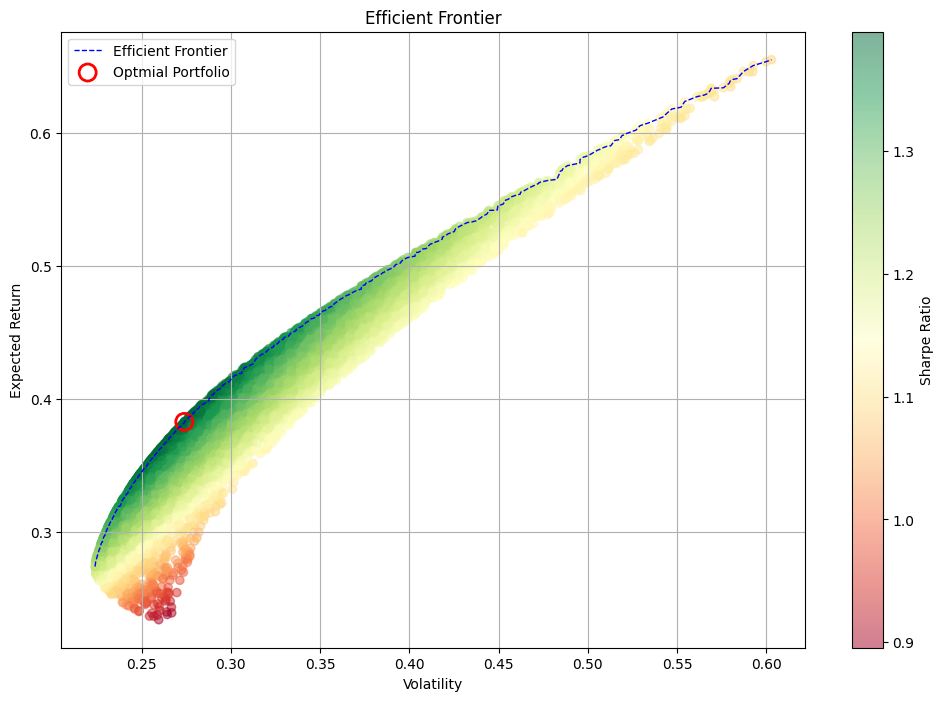

Optimal Portfolio (Max Sharpe Ratio): 
Weights: MSFT=0.0213, TSLA=0.7598, AAPL=0.2189
Returns: 0.3827
Std: 0.2739
Sharpe: 1.3973


In [16]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np

tickers = ["MSFT", "TSLA", "AAPL"]
start_date = "2023-01-01"
end_date = pd.Timestamp.today().strftime('%Y-%m-%d')

#Download the data
stocks = yf.download(tickers, start=start_date, end=end_date)
stocks.columns = stocks.columns.get_level_values(0)
closes = stocks['Close']

#calculate returns
returns = closes.pct_change().dropna()

num_portfolios = 10000
rf=0.0
results = np.zeros((3, num_portfolios)) #np.zeros crea una "Matrice", 3 righe e num_portfolios colonne
weights_record = []

for i in range(num_portfolios): 

    weights = np.random.random(3)
    weights /= np.sum(weights) #Normalizzazione, essenziale in finanza per far sì che tutti i pesi sommati diano 1
    weights_record.append(weights)

    #calculate returns of the portfolio
    portfolio_returns = np.sum(returns.mean() * weights) * 252

    #calculate the volatility (which is the std)
    portfolio_std = np.sqrt(np.dot(weights.T, np.dot(returns.cov() * 252, weights)))

    #Sharpe Ratio
    sharpe_ratio = (portfolio_returns - rf) / portfolio_std

    results[0, i] = portfolio_returns
    results[1, i] = portfolio_std
    results[2, i] = sharpe_ratio

# Estrai i portafogli ordinati per volatilità
sorted_idx = np.argsort(results[1, :])
sorted_std = results[1, :][sorted_idx]
sorted_returns = results[0, :][sorted_idx]

# Calcola la frontiera efficiente (upper envelope)
efficient_frontier = []
max_return = -np.inf
for std, ret in zip(sorted_std, sorted_returns):
    if ret > max_return:
        efficient_frontier.append((std, ret))
        max_return = ret

#Trovo l'ottimizzazione del portafoglio
max_sharpe_idx = np.argmax(results[2])
optimal_weights = weights_record[max_sharpe_idx]
optimal_return = results[0, max_sharpe_idx]
optimal_std = results[1, max_sharpe_idx]
optimal_sharpe = results[2, max_sharpe_idx]

# Plot
efficient_std, efficient_ret = zip(*efficient_frontier)



plt.figure(figsize=(12,8))
plt.plot(efficient_std, efficient_ret, 'b--', linewidth=1, label='Efficient Frontier')
plt.scatter(results[1, :], results[0, :], c=results[2, :], cmap="RdYlGn", marker="o", alpha=0.5)
plt.colorbar(label="Sharpe Ratio")
plt.grid(True)
plt.scatter(optimal_std, optimal_return, marker='o', facecolors='none', color='red', s=150, linewidth=2, label='Optmial Portfolio')
plt.title("Efficient Frontier")
plt.xlabel("Volatility")
plt.ylabel("Expected Return")
plt.legend()
plt.show()

print("Optimal Portfolio (Max Sharpe Ratio): ")
print(f"Weights: MSFT={optimal_weights[0]:.4f}, TSLA={optimal_weights[1]:.4f}, AAPL={optimal_weights[2]:.4f}")
print(f"Returns: {optimal_return:.4f}")
print(f"Std: {optimal_std:.4f}")
print(f"Sharpe: {optimal_sharpe:.4f}")

[*********************100%***********************]  3 of 3 completed


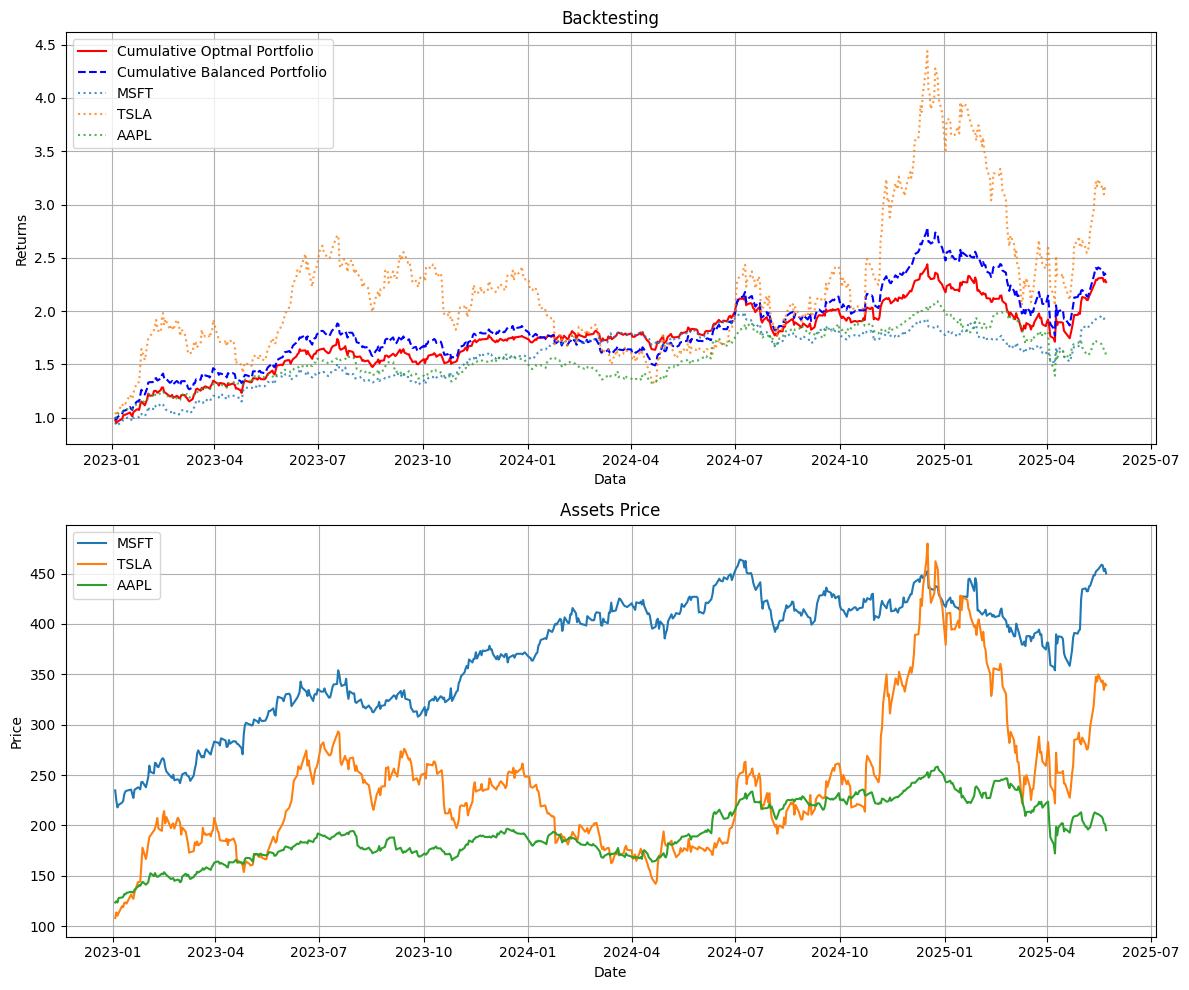


Final Cumulative Returns:
Cumulative Optimal Portfolio: 2.2719
Cumulative Balanced Portfolio: 2.3170


In [17]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

tickers = ["MSFT", "TSLA", "AAPL"]
start_date = "2023-01-01"
end_date = pd.Timestamp.today().strftime('%Y-%m-%d')

stocks = yf.download(tickers, start=start_date, end=end_date)
closes = stocks['Close']
returns = closes.pct_change().dropna()

#Optimized Portfolio
optimal_weights = np.array([0.0213, 0.7598, 0.2189])

#Portfolio with equal weights
balanced_weights = np.array([1/3, 1/3, 1/3])

portfolio_optimal_returns = returns.dot(optimal_weights)
balanced_portfolio_returns = returns.dot(balanced_weights)

cumulative_optimal = (1 + portfolio_optimal_returns).cumprod() 
cumulative_balanced = (1 + balanced_portfolio_returns).cumprod() 
cumulative_assets = (1 + returns).cumprod() 

plt.figure(figsize=(12,10))
plt.subplot(2, 1, 1)
plt.plot(cumulative_optimal, label='Cumulative Optimal Portfolio', color='red')
plt.plot(cumulative_balanced, label='Cumulative Balanced Portfolio', color='blue', linestyle='--')
for ticker in tickers:
    plt.plot(cumulative_assets[ticker], label=ticker, linestyle=':', alpha=0.8)
plt.title('Backtesting')
plt.xlabel("Data")
plt.ylabel("Returns")
plt.grid(True)
plt.legend()

plt.subplot(2, 1, 2)
for ticker in tickers:
    plt.plot(closes[ticker], label=ticker)
plt.title("Assets Price")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

print("\nFinal Cumulative Returns:")
print(f"Cumulative Optimal Portfolio: {cumulative_optimal.iloc[-1]:.4f}")
print(f"Cumulative Balanced Portfolio: {cumulative_balanced.iloc[-1]:.4f}")
